In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
_PATH_ = "https://public.minsky.cc/maria/market_channel_factors_db"

In [3]:
df = pd.read_csv(_PATH_ + "/" + "databases/04ModelDatabaseOfWhitePotato.csv")

In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df.columns

Index(['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO', 'NSELUA', 'UA',
       'crop', 'production', 'totalProduction', 'percentProduction',
       'soldProduction', 'totalSoldProduction', 'percentSoldProduction',
       'farmGatePricePerKg', 'farmGateIncomes', 'totalFarmGateIncomes',
       'percentFarmGateIncomes', 'plantedArea', 'totalPlantedArea',
       'percentPlantedArea', 'yield', 'volumeOfDistrict', 'associative',
       'informalPriceInformation', 'formalPriceInformation',
       'informalMetereologicalInformation', 'formalMetereologicalInformation',
       'localMarket', 'regionalMarket', 'limaMarket', 'agroindustryMarket',
       'exportMarket', 'MARKET_NAN', 'MARKETS', 'MARKETS_QTY', 'marketSize',
       'collector', 'wholesaler', 'retailer', 'enterprise', 'finalConsumer',
       'marketChannelDirectedness', 'pointsOfSale', 'districtTimeToLimaMarket',
       'districtTimeToProvinceCapitalOfRegion', 'provinceCapitalToLimaMarket'],
      dtype='object')

# Changing scale

x1: District time to Lima Market [10 hours] <br>
x2: District time to Province capital [hours] <br>
x3: Province capital to Lima Market [10 hours] <br>
x4: Informal price information [0, 1] <br>
x5: Formal price information [0, 1] <br>
x6: Informal meteorological information [0, 1] <br>
x7: Formal meteorological information [0, 1] <br>
x8: Volume of district [1000 tons] <br>
x9: Volume of UA [100 tons] <br>
x10: Yield [Kg/m2] <br>
x11: Associativity [0, 1] <br>
x12: District´s points of sale [100 points] <br>
m1: Market size access [1: Local market, 2: Regional Market, 3: Lima Market] <br>
m2_a: Market channel directedness [1: Collector, 2: Wholesaler, 3: Retailer, 4: Final Consumer] <br>
y: Farm gate price per kg [S//Kg]

In [6]:
df["districtTimeToLimaMarket"] = df["districtTimeToLimaMarket"] / 10
df["districtTimeToProvinceCapitalOfRegion"] = df["districtTimeToProvinceCapitalOfRegion"] / 10
df["provinceCapitalToLimaMarket"] = df["provinceCapitalToLimaMarket"] / 10
df["informalPriceInformation"] = df["informalPriceInformation"]
df["formalPriceInformation"] = df["formalPriceInformation"]
df["informalMetereologicalInformation"] = df["informalMetereologicalInformation"]
df["formalMetereologicalInformation"] = df["formalMetereologicalInformation"]
df["volumeOfDistrict"] = df["volumeOfDistrict"] / 1000000
df["soldProduction"] = df["soldProduction"] / 100000
df["yield"] = df["yield"] / 10000
df["associative"] = df["associative"]
df["pointsOfSale"] = df["pointsOfSale"] / 100
df["marketSize"] = df["marketSize"].map({"Local market": 1, "Regional market": 2, "Lima markets": 3})
df["marketChannelDirectedness"] = df["marketChannelDirectedness"].map({"Collector": 1, "Wholesaler": 2, "Retailer": 3, "Final consumer": 4})
df["farmGatePricePerKg"] = df["farmGatePricePerKg"]

In [7]:
df["pointsOfSale"] = df["pointsOfSale"].fillna(0)

# Fixing multicollinearity

In [8]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [9]:
variables_x = ["districtTimeToLimaMarket", "districtTimeToProvinceCapitalOfRegion", "provinceCapitalToLimaMarket", "informalPriceInformation", "formalPriceInformation", "informalMetereologicalInformation", "formalMetereologicalInformation", "volumeOfDistrict", "soldProduction", "yield", "associative", "pointsOfSale"]


In [10]:
variables_m = ["marketSize", "marketChannelDirectedness"]

In [11]:
variable_y = ["farmGatePricePerKg"]

### Independent variables

In [12]:
X = df[variables_x]
calc_vif(X)

,variables,VIF
0,districtTimeToLimaMarket,49.012797
1,districtTimeToProvinceCapitalOfRegion,3.701407
2,provinceCapitalToLimaMarket,42.369806
3,informalPriceInformation,2.893575
4,formalPriceInformation,1.943351
5,informalMetereologicalInformation,2.088985
6,formalMetereologicalInformation,2.497755
7,volumeOfDistrict,1.753991
8,soldProduction,1.746424
9,yield,2.221107


In [14]:
X = df[variables_x].drop(["provinceCapitalToLimaMarket"],axis=1)
calc_vif(X)

,variables,VIF
0,districtTimeToLimaMarket,4.294984
1,districtTimeToProvinceCapitalOfRegion,3.391632
2,informalPriceInformation,2.869716
3,formalPriceInformation,1.942938
4,informalMetereologicalInformation,2.088547
5,formalMetereologicalInformation,2.476171
6,volumeOfDistrict,1.751091
7,soldProduction,1.742876
8,yield,2.220591
9,associative,1.064239


### Mediator variables

In [15]:
M = df[variables_m]
calc_vif(M)

,variables,VIF
0,marketSize,2.787973
1,marketChannelDirectedness,2.787973


# Export dataframe for Model 1

In [16]:
variablesForModel = ["districtTimeToLimaMarket", "districtTimeToProvinceCapitalOfRegion", "provinceCapitalToLimaMarket", "informalPriceInformation", "formalPriceInformation", "informalMetereologicalInformation", "formalMetereologicalInformation", "volumeOfDistrict", "soldProduction", "yield", "associative", "pointsOfSale", "marketSize", "marketChannelDirectedness", "farmGatePricePerKg"]

In [17]:
indices = ["NOMBREDD", "NOMBREPV", "NOMBREDI", "CONGLOMERADO", "NSELUA", "UA"]

In [18]:
other = ["percentSoldProduction", "percentFarmGateIncomes", "percentPlantedArea"]

In [19]:
var = np.append(np.append(indices, other), variablesForModel)

In [20]:
df[var].to_csv("01ModelDataframeOfWhitePotato.csv")

# Import dataframe of Model 1

In [21]:
df01 = pd.read_csv("01ModelDataframeOfWhitePotato.csv")

In [22]:
len(df01)

2064

In [23]:
df01.columns

Index(['Unnamed: 0', 'NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO',
       'NSELUA', 'UA', 'percentSoldProduction', 'percentFarmGateIncomes',
       'percentPlantedArea', 'districtTimeToLimaMarket',
       'districtTimeToProvinceCapitalOfRegion', 'provinceCapitalToLimaMarket',
       'informalPriceInformation', 'formalPriceInformation',
       'informalMetereologicalInformation', 'formalMetereologicalInformation',
       'volumeOfDistrict', 'soldProduction', 'yield', 'associative',
       'pointsOfSale', 'marketSize', 'marketChannelDirectedness',
       'farmGatePricePerKg'],
      dtype='object')

# Segmentar por Farm gate price per kg

### x < 5 ton

In [24]:
df_5ton = df01[df01["soldProduction"] < 0.05].drop(columns=["Unnamed: 0"]).reset_index(drop=True)

In [25]:
len(df_5ton)

1605

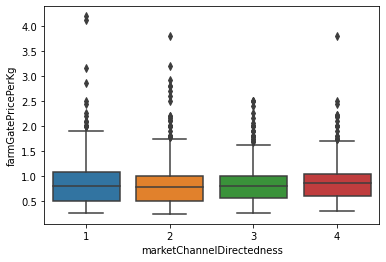

In [26]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5ton)

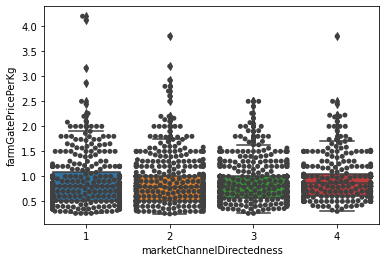

In [27]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5ton)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5ton, color=".25")

### 5 ton ≤ x < 10 ton

In [28]:
df_5_10ton = df01[(df01["soldProduction"] >= 0.05) & (df["soldProduction"] < 0.10)].drop(columns=["Unnamed: 0"]).reset_index(drop=True)

In [29]:
len(df_5_10ton)

224

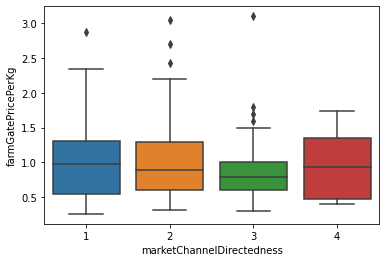

In [30]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5_10ton)

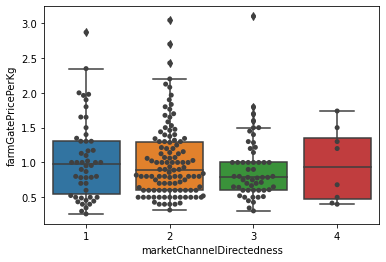

In [31]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5_10ton)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5_10ton, color=".25")

### x ≥ 10 ton

In [32]:
df_10_ton = df01[df01["soldProduction"] >= 0.10].drop(columns=["Unnamed: 0"]).reset_index(drop=True)

In [33]:
len(df_10_ton)

235

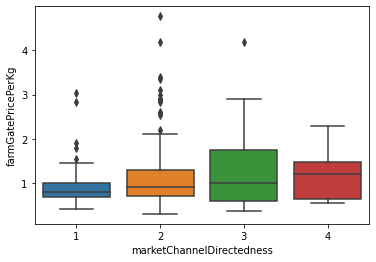

In [34]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_10_ton)

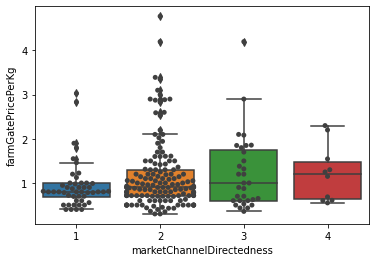

In [35]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_10_ton)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_10_ton, color=".25")

# All

In [36]:
len(df01)

2064

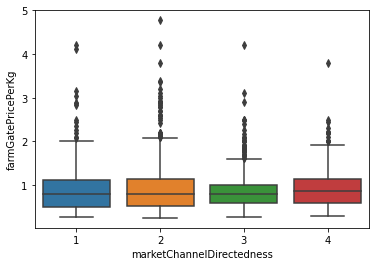

In [37]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df01)

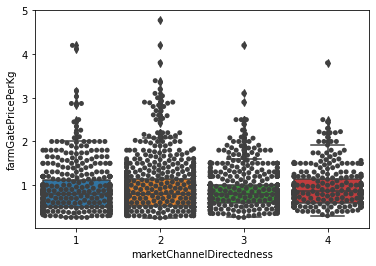

In [38]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df01)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df01, color=".25")

In [39]:
df_5ton.to_csv("01ModelDataframeOfWhitePotato_5ton.csv")
df_5_10ton.to_csv("01ModelDataframeOfWhitePotato_5_10ton.csv")
df_10_ton.to_csv("01ModelDataframeOfWhitePotato_10_ton.csv")